This kernel will consist of a full EDA and predictive analysis of attrition at this firm, followed by some calculations of the likely business costs under each of the various models I will use. The key insight I am pursuing here is the tradeoff between model accuracy and ROI - a more accurate model of attrition does not necessarily lead to a higher return on investment of a firm's retention budget. Understanding this and being able to talk intelligently about it is key to creating workable retention strategies that make the HR function truly strategic.

As background, there has been a great deal of talk for a couple decades now about the need for HR to be more strategic. Aside from any philosophical discussions of the true nature of 'strategy' and strategic thinking, what this normally means is that business leaders want HR to be more like their marketing departments - analytical, results-oriented, and able to directly tie their activities to the firm's desired outcomes (more money!!). Marketing firms today rely quite heavily on predictive analytics and data mining/data science. The future of HR likely lies along this same road. This kernel explores one potential problem such an analytical 'strategic' HR practicioner might reasonably expect to wrestle with.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [8]:
## Great - You have go monthly income vs monthly rate - makes it easy to see performance.

In [7]:
data = pd.read_csv('data/attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Time to do some EDA! First I'll use the describe() method to look at some descriptive statistics and then I'll start visualizing some of the relationships between these variables.

In [5]:
pd.options.display.max_columns = None

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's do some common-sense quality checks to start with, since the appropriate information is provided. We are provided with a daily and hourly rate and the standard hours each employee is supposed to be working. We are also told whether they work overtime or not, but not how many hours they get. So first let's see if weekly hours exceeding their standard hours equates to overtime, then calculate the actual number of hours of overtime each employee is actually working.

To do this accurately I need to reflect whether these employees get paid extra for overtime. I will assume that the yes/no values in the overtime column reflect whether the employee in question is authorized overtime rather than whether or not they have actually worked it. The metric definitions provided by IBM do not specify whether this is the case or not.

If the employee is authorized overtime I'll adjust hours over 80 to reflect 150% of base pay, which is the standard rate for overtime pay under the Fair Labor Standards Act. Otherwise I'll make no adjustment.

In [10]:
pd.options.mode.chained_assignment = None

data['RealHours'] = data['DailyRate'] / data['HourlyRate'] * 10
data['HoursDelta'] = data['RealHours'] - data['StandardHours']
print(data['HoursDelta'][:15])

data['PaidOverTime'] = data['HoursDelta'] - 80
print(data['PaidOverTime'][:15])
for row, value in enumerate(data['PaidOverTime']):
    if value < 0:
        data['PaidOverTime'][row] = 0
    if value > 0:
        data['PaidOverTime'][row] = data['PaidOverTime'][row] / 1.5
    if data['OverTime'][row] == 'No':
        data['PaidOverTime'][row] = 0
        
print(data['PaidOverTime'][:15])

0      37.234043
1     -34.262295
2      69.239130
3     168.571429
4      67.750000
5      47.215190
6      83.456790
7     122.686567
8     -30.909091
9      58.191489
10     16.309524
11    -48.775510
12    136.129032
13     64.731183
14    -59.400000
Name: HoursDelta, dtype: float64
0     -42.765957
1    -114.262295
2     -10.760870
3      88.571429
4     -12.250000
5     -32.784810
6       3.456790
7      42.686567
8    -110.909091
9     -21.808511
10    -63.690476
11   -128.775510
12     56.129032
13    -15.268817
14   -139.400000
Name: PaidOverTime, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3     59.047619
4      0.000000
5      0.000000
6      2.304527
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
Name: PaidOverTime, dtype: float64


Some folks who are working more than their required hours have a 'No' in the overtime column. But how can this be when I am capturing their extra hours as a function of their Daily and Hourly rate? If they aren't getting paid for it then this should not show up here.

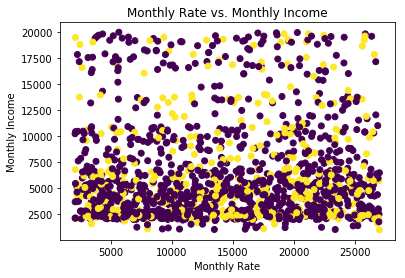

[[1.         0.03481363]
 [0.03481363 1.        ]]


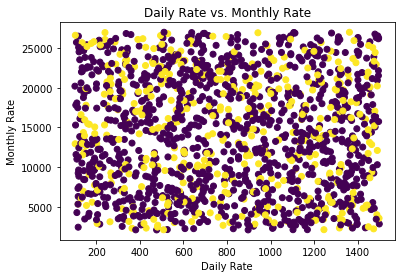

[[ 1.        -0.0321816]
 [-0.0321816  1.       ]]


In [11]:
data['OT'] = 0
data['OT'][data['OverTime'] == 'Yes'] = 1


_ = plt.scatter(data['MonthlyRate'], data['MonthlyIncome'], c=data['OT'])
_ = plt.xlabel('Monthly Rate')
_ = plt.ylabel('Monthly Income')
_ = plt.title('Monthly Rate vs. Monthly Income')
plt.show()
print(np.corrcoef(data['MonthlyRate'], data['MonthlyIncome']))

_ = plt.scatter(data['DailyRate'], data['MonthlyRate'], c=data['OT'])
_ = plt.xlabel('Daily Rate')
_ = plt.ylabel('Monthly Rate')
_ = plt.title('Daily Rate vs. Monthly Rate')
plt.show()
print(np.corrcoef(data['DailyRate'], data['MonthlyRate']))

In [14]:
data['left'] = 0
data['left'][data['Attrition'] == 'Yes'] = 1
x = data['left']
print('Monthly Rate:', np.corrcoef(data['MonthlyRate'], x))
print('Daily Rate', np.corrcoef(data['DailyRate'], x))
print('Hourly Rate', np.corrcoef(data['HourlyRate'], x))
print('Monthly Income', np.corrcoef(data['MonthlyIncome'], x))
print('Log Rate Ratio', np.corrcoef(data['lograteratio'] ** 35, x))

Monthly Rate: [[1.         0.01517021]
 [0.01517021 1.        ]]
Daily Rate [[ 1.         -0.05665199]
 [-0.05665199  1.        ]]
Hourly Rate [[ 1.         -0.00684555]
 [-0.00684555  1.        ]]
Monthly Income [[ 1.         -0.15983958]
 [-0.15983958  1.        ]]
Log Rate Ratio [[1.         0.09907961]
 [0.09907961 1.        ]]


In [15]:
del data['RealHours']
del data['HoursDelta']
del data['PaidOverTime']

data['lograteratio'] = data['lograteratio'] ** 35

Now I'll get a quick overview of some salient features. Bokeh provides a convenient way to display a ton of information in a user friendly way. It is also, incidentally, great for helping communicate important ideas to non-technical audiences.

In [16]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OT,lograteratio,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,1.090355e+16,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,6.828891e+22,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,1.257600e-09,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,5.171307e+15,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,2.082990e+18,0


I've become a fan of 3D scatter plots for visualizing HR datasets, so I'll use those to look at some key variables here. By plotting different features on each of the three axes, color, and size, I can effectively visualize five dimensions of my data simultaneously. As long as I pick the variables I want to look at well, I can learn a lot from this method.

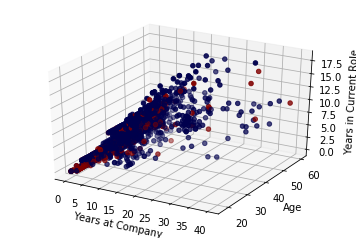

In [18]:
## In red you have those that left
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['YearsAtCompany']
y = data['Age']
z = data['YearsInCurrentRole']
s = data['WorkLifeBalance']
c = data['left']
cmap = plt.get_cmap('seismic')
_ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap)
_ = ax.set_xlabel('Years at Company')
_ = ax.set_ylabel('Age')
_ = ax.set_zlabel('Years in Current Role')
_ = plt.title('')
plt.show()

Lots of attrition among the young and inexperienced. This is no surprise. I'll try to capture some of that in a seperate feature.

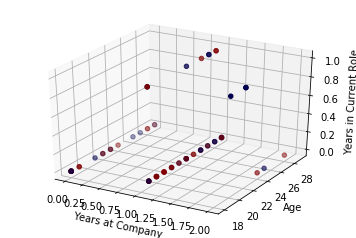

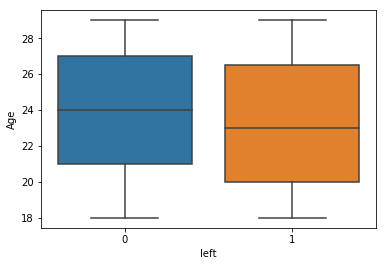

In [19]:
young = data[(data['Age'] < 30) & (data['YearsAtCompany'] <= 2) & (data['YearsInCurrentRole'] <= 1)]
data['young'] = 0
data['young'][(data['Age'] < 30) & (data['YearsAtCompany'] <= 2) & (data['YearsInCurrentRole'] <= 1)] = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = young['YearsAtCompany']
y = young['Age']
z = young['YearsInCurrentRole']
s = young['WorkLifeBalance']
c = young['left']
cmap = plt.get_cmap('seismic')
_ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap)
_ = ax.set_xlabel('Years at Company')
_ = ax.set_ylabel('Age')
_ = ax.set_zlabel('Years in Current Role')
_ = plt.title('')
plt.show()

_ = sns.boxplot(young['left'], young['Age'])
plt.show()

In [21]:
print(np.corrcoef(young['left'], young['Age']))
print(np.count_nonzero(young['left']) / len(young['left']))
percent1 = np.round(np.count_nonzero(young['left']) / len(young['left']) * 100, decimals=2)
print('{}% of workers aged under 30 leaves the firm'.format(percent1))
print(np.corrcoef(data['left'], data['Age']))
percent = np.round(np.count_nonzero(data['left']) / len(data['left']) * 100, decimals=2)
print('{}% of the total population leaves the firm.'.format(percent))
corr = np.corrcoef(data['young'], data['left'])
for item in corr[1]:
    print(np.round(item * 100, decimals=2),'%')

[[ 1.         -0.10487066]
 [-0.10487066  1.        ]]
0.5375
53.75% of workers aged under 30 leaves the firm
[[ 1.         -0.15920501]
 [-0.15920501  1.        ]]
16.12% of the total population leaves the firm.
24.55 %
100.0 %


I get a 24.55% correlation between my 'young' group and attrition. Not too terrible.

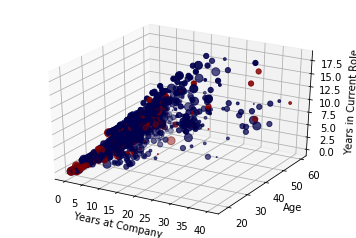

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['YearsAtCompany']
y = data['Age']
z = data['YearsInCurrentRole']
s = data['WorkLifeBalance']
c = data['left']
cmap = plt.get_cmap('seismic')
_ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap, s=s ** 3)
_ = ax.set_xlabel('Years at Company')
_ = ax.set_ylabel('Age')
_ = ax.set_zlabel('Years in Current Role')
_ = plt.title('')
plt.show()

I seem to observe a group in the middle of our workforce here that has pretty good work/life balance, is middle-aged, has little time at the company, and does not tend to attrit as frequently as the balance of the workforce. Let's 'zoom-in' and see if we can extract some goodness here as well.

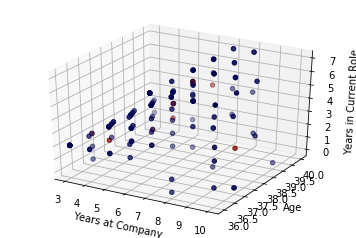

0.06338028169014084
6.34% of my mid-career workers leave the firm
There are 142 mid-career employees with exceptionally low average attrition in this firm.
-8.7 %
100.0 %


In [23]:
mid = data[(data['Age'] > 35) & (data['Age'] <= 40) & (data['YearsAtCompany'] <= 10) & (data['YearsAtCompany'] > 2) & (data['YearsInCurrentRole'] <= 7)]
data['mid'] = 0
data['mid'][(data['Age'] > 35) & (data['Age'] <= 40) & (data['YearsAtCompany'] <= 10) & (data['YearsAtCompany'] > 2) & (data['YearsInCurrentRole'] <= 7)] = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = mid['YearsAtCompany']
y = mid['Age']
z = mid['YearsInCurrentRole']
s = mid['WorkLifeBalance']
c = mid['left']
cmap = plt.get_cmap('seismic')
_ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap)
_ = ax.set_xlabel('Years at Company')
_ = ax.set_ylabel('Age')
_ = ax.set_zlabel('Years in Current Role')
_ = plt.title('')
plt.show()

print(np.count_nonzero(mid['left']) / len(mid['left']))
percent1 = np.round(np.count_nonzero(mid['left']) / len(mid['left']) * 100, decimals=2)
print('{}% of my mid-career workers leave the firm'.format(percent1))
print('There are {} mid-career employees with exceptionally low average attrition in this firm.'.format(len(mid)))
corr = np.corrcoef(data['mid'], data['left'])
for item in corr[1]:
    print(np.round(item * 100, decimals=2),'%')

This group seems to comprise my most stable mid-career employees. Attrition is markedly lower here than it is throughout the rest of the workforce. This group comprises about 10% of my total workforce. I could actually have gotten the attrition rate down to barely over 4% of this group if I had narrowed it down to an age range of from 36-38, but that's fewer than 100 people and seemed too restrictive to really be valuable. I'm making a subjective call here to increase the size of this group a little.

This group displays a -8.7% correlation to attrition.

I tried taking the same approach with my older workers but was not impressed with the results.

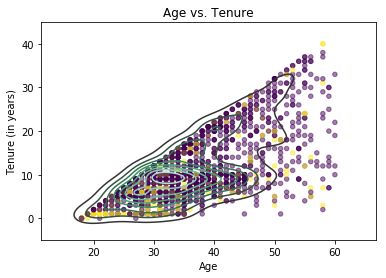

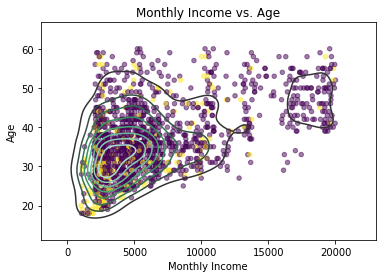

In [24]:
## density inclusion
_ = sns.kdeplot(data = data['Age'], data2 = data['TotalWorkingYears'])
_ = plt.scatter(data['Age'], data['TotalWorkingYears'], alpha=.5, s=20, c=data['left'])
_ = plt.xlabel('Age')
_ = plt.ylabel('Tenure (in years)')
_ = plt.title('Age vs. Tenure')
plt.show()

_ = sns.kdeplot(data=data['MonthlyIncome'], data2=data['Age'])
_ = plt.scatter(data['MonthlyIncome'], data['Age'], alpha=0.5, s=20, c=data['left'])
_ = plt.xlabel('Monthly Income')
_ = plt.ylabel('Age')
_ = plt.title('Monthly Income vs. Age')
plt.show()

Here's something interesting. We have quite a cluster of attrition among young, low-paid employees. I've already captured this group in my 'young' column. We also have a group of highly paid individuals who rarely attrit. 

In [25]:
data['high_income'] = 0
data['high_income'][(data['Age'] >= 25) & (data['MonthlyIncome'] > 13000)] = 1

count = np.count_nonzero(data['high_income'])
print('There are {} highly paid employees with low average attrition'.format(count))
corr = np.corrcoef(data['high_income'], data['left'])
for item in corr[0]:
    l = []
    l.append(np.round(item * 100, decimals=2))
print('Correlation between this group and attrition is {}%'.format(l[0]))

There are 185 highly paid employees with low average attrition
Correlation between this group and attrition is -11.62%


In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

data['Attrition'] = LE().fit_transform(data['Attrition'])
data['Department'] = LE().fit_transform(data['Department'])
data['EducationField'] = LE().fit_transform(data['EducationField'])
data['Gender'] = LE().fit_transform(data['Gender'])
data['JobRole'] = LE().fit_transform(data['JobRole'])
data['MaritalStatus'] = LE().fit_transform(data['MaritalStatus'])
data['Over18'] = LE().fit_transform(data['Over18'])
data['OverTime'] = LE().fit_transform(data['OverTime'])
data['BusinessTravel'] = LE().fit_transform(data['BusinessTravel'])
del data['left']
del data['OT']
del data['EmployeeNumber']
del data['EmployeeCount']

Now let's see if we can extract some goodness with a clustering algorithm. Something I have noticed with HR datasets is that employee behavior seems to exhibit a fair amount of clustering.

For the sake of intellectual honesty I'm going to split out my train and test sets before I move forward and apply my transformations to them separately. That will reduce the accuracy of my scores in the end probably, but it more accurately reflects the experience of making actual predictions. After all, if I already know what I'm trying to predict, what's the point of predicting it?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X = data
y = data['Attrition']
del X['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


cluster = KMeans(n_clusters=80, random_state=42).fit_predict(X_train)
X_train['cluster'] = cluster
X_train['cluster'].plot(kind='hist', bins=80)
_ = plt.xlabel('Cluster')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of Clusters')
plt.show()

_ = plt.scatter(x=X_train['Age'], y=X_train['DailyRate'], c=X_train['cluster'], cmap='Blues')
_ = sns.kdeplot(data=X_train['Age'], data2=X_train['DailyRate'])
_ = plt.xlabel('Age')
_ = plt.ylabel('Daily Rate')
_ = plt.title('Clusters within Age/Daily Rate')
plt.show()

x = np.corrcoef(X_train['cluster'], y_train)
print(x)

It will be interesting to see if this helps. I've chosen to go with 80 clusters by trial and error. You can see in the scatter/kde plot above that most of my clusters occur among employees with a low daily rate, although the majority of my employees are in a single cluster above about 600.

Modeling
========

Time to get serious! First I'll run the same transformation on my test data that I just did on my train data, then I'll run some classifiers, see which one works best, and tune it for optimal performance.

In [ ]:
cluster = KMeans(n_clusters=80, random_state=42).fit_predict(X_test)
X_test['cluster'] = cluster


Random Forest
-------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

fmodel = RFC(n_estimators=100, random_state=42, max_depth=11, max_features=11).fit(X_train, y_train)
prediction = fmodel.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

Support Vector Classification
----------------------------

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=42).fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

ADA Boost Classifier
--------------------

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC

model = ABC(n_estimators=100, random_state=42, learning_rate=.80).fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

Bagging Classifier
----------------

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC

model = BC(n_estimators=100, random_state=42).fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

Extra Trees Classifier
----------------------

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as XTC

model = XTC(n_estimators=100, random_state=42, criterion='entropy', max_depth=20).fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print(score)

Looks like my best models, once the parameters are tuned a little bit, are the Random Forest and the Extra Trees Classifier. All of them perform very similarly however.

Time for some sleep! Please ***UPVOTE*** if you like what you see.
==================================================================